In [200]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import acf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import STL,seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [201]:
df=pd.read_csv("arrivals.csv")

### Model Fitting

1 . ARIMA Model

In [202]:
df_arima = df.copy()

In [203]:
df_arima.head()

,Date,arrivals
0,1970-01,5158
1,1970-02,5436
2,1970-03,4814
3,1970-04,3284
4,1970-05,3754


In [204]:
df_arima['Date'] = pd.to_datetime(df_arima['Date'])

In [205]:
df_arima.set_index('Date',inplace=True)

In [206]:
df_arima.head()

,arrivals
Date,
1970-01-01,5158
1970-02-01,5436
1970-03-01,4814
1970-04-01,3284
1970-05-01,3754


<Axes: xlabel='Date'>

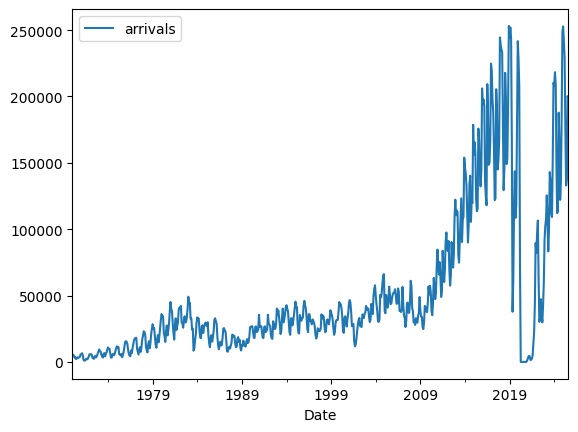

In [207]:
df_arima.plot()

In [208]:
test_result=adfuller(df_arima['arrivals'])

In [209]:
def adfuller_test(arrivals):
    result=adfuller(arrivals)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [210]:
adfuller_test(df_arima['arrivals'])

ADF Test Statistic : -1.878567744380572
p-value : 0.3422097073741963
#Lags Used : 20
Number of Observations Used : 647
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [211]:
### Apply log transformation
df_arima['log_arrivals'] = np.log(df_arima['arrivals'] + 1)

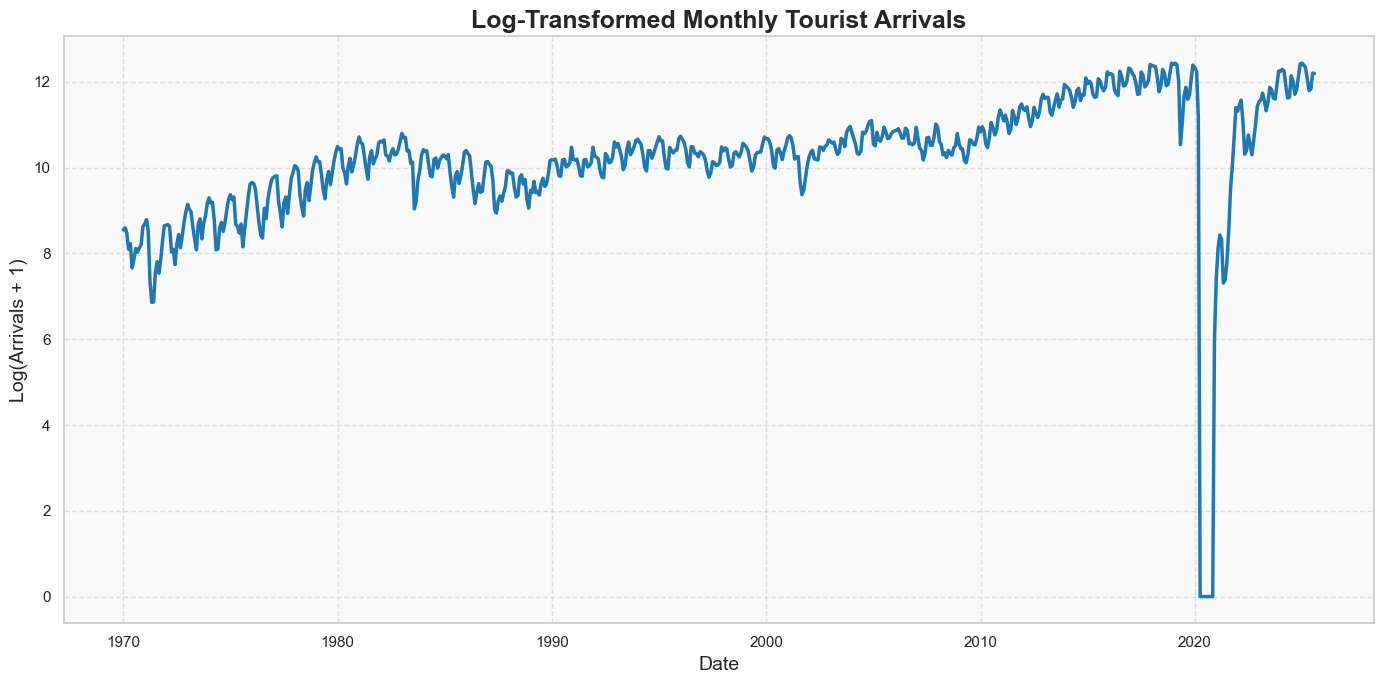

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set modern Seaborn style
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(14, 7))
plt.plot(df_arima.index, df_arima['log_arrivals'], color="#1f77b4", linewidth=2.5)

# Add title and labels
plt.title("Log-Transformed Monthly Tourist Arrivals", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Log(Arrivals + 1)", fontsize=14)

# Add grid and subtle styling
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Add background and frame
plt.gca().set_facecolor('#f9f9f9')
plt.show()


In [181]:
adfuller_test(df_arima['log_arrivals'])

ADF Test Statistic : -3.371969922912621
p-value : 0.011952346235866234
#Lags Used : 18
Number of Observations Used : 649
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [182]:
df_arima['diff_log_arrivals'] = df_arima['log_arrivals'].diff()

<Axes: xlabel='Date'>

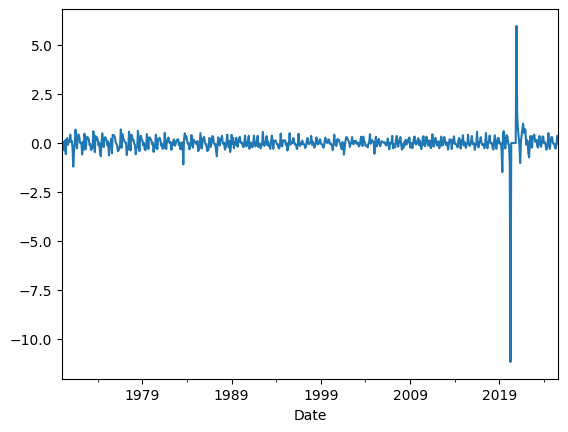

In [183]:
df_arima['diff_log_arrivals'].plot()

In [184]:
df_arima['diff_log_arrivals_first Difference'] = df_arima['diff_log_arrivals'] - df_arima['diff_log_arrivals'].shift(1)

In [185]:
df_arima['diff_log_arrivals_seasonal First Difference']=df_arima['diff_log_arrivals'] - df_arima['diff_log_arrivals'].shift(12)

In [186]:
df_arima.head(14)

,arrivals,log_arrivals,diff_log_arrivals,diff_log_arrivals_first Difference,diff_log_arrivals_seasonal First Difference
Date,,,,,
1970-01-01,5158,8.548498,NaN,NaN,NaN
1970-02-01,5436,8.600983,0.052485,NaN,NaN
1970-03-01,4814,8.479491,-0.121491,-0.173976,NaN
1970-04-01,3284,8.097122,-0.382369,-0.260878,NaN
1970-05-01,3754,8.230844,0.133722,0.516091,NaN
1970-06-01,2121,7.660114,-0.570729,-0.704451,NaN
1970-07-01,2596,7.862112,0.201998,0.772727,NaN
1970-08-01,3352,8.117611,0.255499,0.053501,NaN
1970-09-01,3074,8.031060,-0.086551,-0.342049,NaN


In [187]:
adfuller_test(df_arima['diff_log_arrivals_seasonal First Difference'].dropna())

ADF Test Statistic : -9.135153176988362
p-value : 2.949343630305827e-15
#Lags Used : 19
Number of Observations Used : 635
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

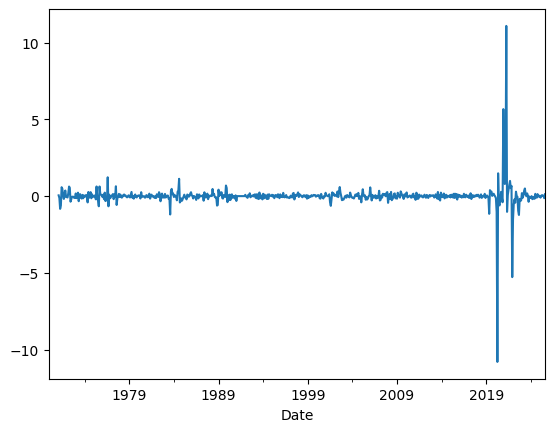

In [188]:
df_arima['diff_log_arrivals_seasonal First Difference'].plot()

In [189]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [190]:
import statsmodels.api as sm


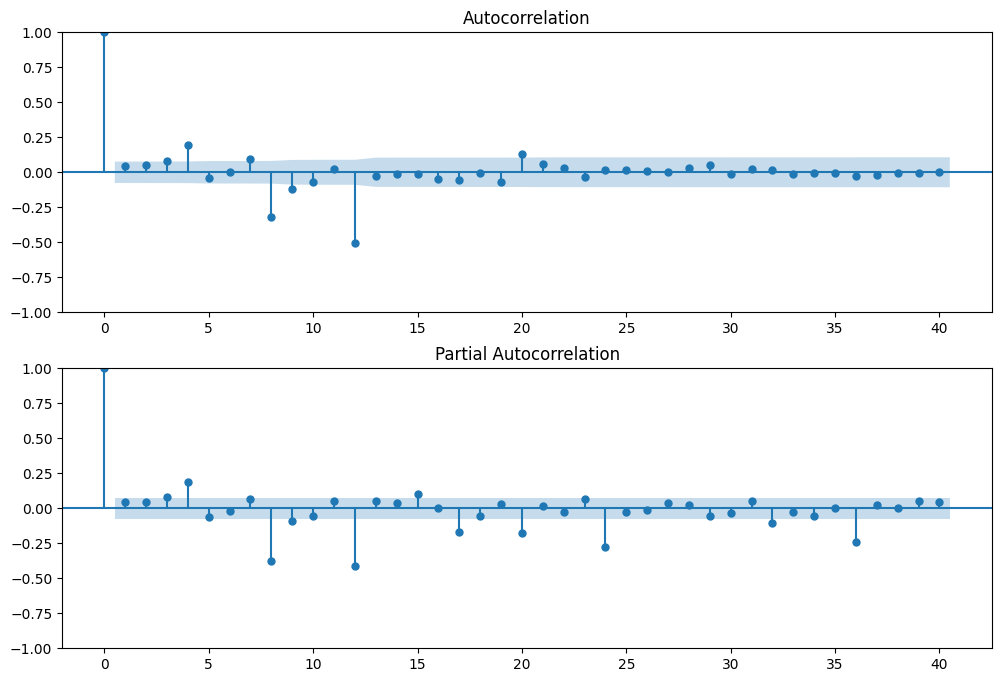

In [191]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima['diff_log_arrivals_seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima['diff_log_arrivals_seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [192]:
## p = 1
## d = 1
## q = 1

In [193]:
train_size = len(df_arima) - 12

df_train_arima = df_arima.iloc[:train_size].copy()
df_test_arima = df_arima.iloc[train_size:].copy()

In [194]:
# Import the ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training set (log-transformed data)
model = ARIMA(df_train_arima['log_arrivals'], order=(1, 1, 1))
model_fit = model.fit()

In [195]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           log_arrivals   No. Observations:                  656
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -547.374
Date:                Sat, 25 Oct 2025   AIC                           1100.747
Time:                        23:08:15   BIC                           1114.201
Sample:                    01-01-1970   HQIC                          1105.964
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0105      0.412     -0.026      0.980      -0.818       0.797
ma.L1          0.1588      0.417      0.380      0.704      -0.659       0.977
sigma2         0.3114      0.002    175.852      0.0

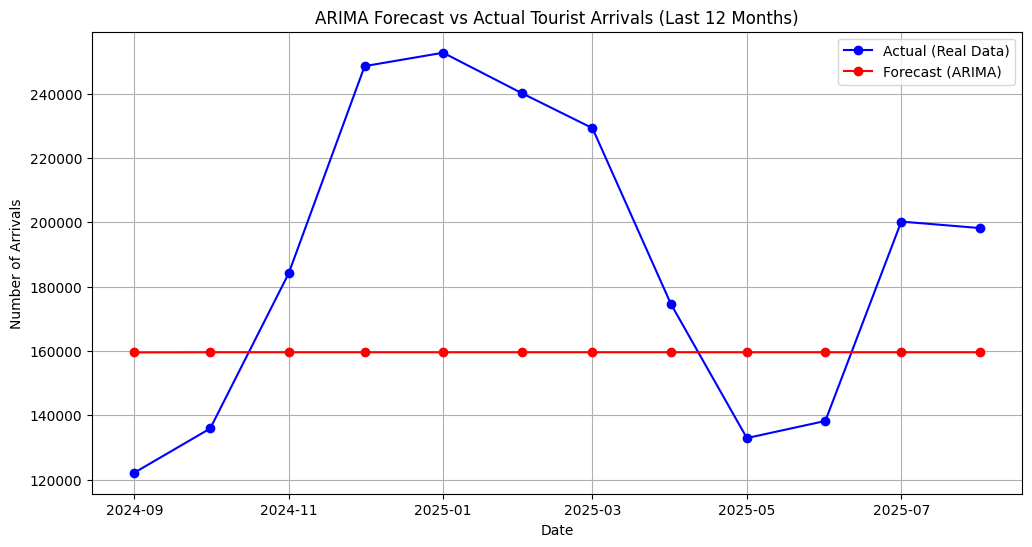

In [198]:
forecast_steps = 12  # number of test points
forecast_log = model_fit.forecast(steps=forecast_steps)

# Convert back to real scale
forecast_real = np.exp(forecast_log) - 1

# Get the last 12 actual data points
actual = df_arima['arrivals'].iloc[-forecast_steps:]

# Create matching index for forecast values
forecast_index = actual.index

# ----------------------------
# Plot actual vs forecast
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(forecast_index, actual, label='Actual (Real Data)', color='blue', marker='o')
plt.plot(forecast_index, forecast_real, label='Forecast (ARIMA)', color='red', marker='o')
plt.title('ARIMA Forecast vs Actual Tourist Arrivals (Last 12 Months)')
plt.xlabel('Date')
plt.ylabel('Number of Arrivals')
plt.legend()
plt.grid(True)
plt.show()

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Last 12 actual data points (test set)
actual = df_arima['arrivals'].iloc[-12:]

# Forecasted values for the test set
forecast = forecast_real  # from previous forecast

# Calculate error metrics
mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)

# Print the results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 46704.29
MSE: 2921389877.54
RMSE: 54049.88


### LSTM model

In [103]:
time_line = 'Date'
response_name = 'arrivals'


### convert time_line into date time format
df[time_line] = pd.to_datetime(df[time_line])

### data frame with only reponse
data_response = df[response_name]

In [104]:
###Data set for LSTM model build
df_lstm = df.copy()
df_lstm =pd.concat([df[time_line], data_response], axis=1)
df_lstm.set_index(time_line, inplace=True)
df_lstm.sort_index(axis=1)
df_lstm.head()

,arrivals
Date,
1970-01-01,5158
1970-02-01,5436
1970-03-01,4814
1970-04-01,3284
1970-05-01,3754


In [105]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(df_lstm)

In [106]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])  # Include all columns
        y.append(data[i + time_steps, 0])  # Target (1st column)
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_sequences(data_scaled, time_steps)


In [107]:
print("X shape:", X.shape)  # Should be (samples, timesteps, features)
print("y shape:", y.shape)  # Should be (samples,)


X shape: (656, 12, 1)
y shape: (656,)


In [108]:
# Train-test split (last 12 points for test set)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

In [109]:
def build_model(params):
    model = Sequential()
    model.add(LSTM(units=params['lstm_units'], activation=params['activation'], return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='linear'))
    
    optimizer_mapping = {'rmsprop': RMSprop(), 'adam': Adam(), 'sgd': SGD()}
    model.compile(loss='mse', optimizer=optimizer_mapping[params['optimizer']], metrics=['mae'])
    return model

In [110]:
# Define hyperparameter space
space = {
    'lstm_units': hp.choice('lstm_units', [50, 100, 150]),
    'optimizer': hp.choice('optimizer', ['rmsprop', 'adam', 'sgd']),
    'activation': hp.choice('activation', ['linear', 'relu', 'tanh']),
    'dropout': hp.uniform('dropout', 0.1, 0.5)
}

In [111]:
def objective(params):
    model = build_model(params)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=0)
    loss = min(history.history['val_loss'])
    return {'loss': loss, 'status': STATUS_OK, 'model': model}

# Run Bayesian Optimization
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

100%|██████████| 20/20 [02:45<00:00,  8.29s/trial, best loss: 0.11735624074935913]


In [112]:
# Map best_params values correctly
best_params['lstm_units'] = [50, 100, 150][best_params['lstm_units']]

In [113]:
best_params['activation'] = ['linear', 'relu', 'tanh'][best_params['activation']]

In [114]:
best_params['optimizer'] = ['rmsprop', 'adam', 'sgd'][best_params['optimizer']]

In [115]:
best_params

{'activation': 'tanh',
 'dropout': 0.22372418692631324,
 'lstm_units': 150,
 'optimizer': 'rmsprop'}

In [116]:
# Train final model with best parameters
final_model = build_model(best_params)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
final_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1 , shuffle=False)

Epoch 1/50
17/17 [==============================] - 2s 34ms/step - loss: 0.0879 - mae: 0.1680 - val_loss: 0.1910 - val_mae: 0.3512
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 0.0168 - mae: 0.0986 - val_loss: 0.1858 - val_mae: 0.3449
Epoch 3/50
17/17 [==============================] - 0s 11ms/step - loss: 0.0156 - mae: 0.0974 - val_loss: 0.1806 - val_mae: 0.3381
Epoch 4/50
17/17 [==============================] - 0s 10ms/step - loss: 0.0133 - mae: 0.0918 - val_loss: 0.1764 - val_mae: 0.3326
Epoch 5/50
17/17 [==============================] - 0s 10ms/step - loss: 0.0141 - mae: 0.0933 - val_loss: 0.1731 - val_mae: 0.3284
Epoch 6/50
17/17 [==============================] - 0s 11ms/step - loss: 0.0121 - mae: 0.0875 - val_loss: 0.1704 - val_mae: 0.3252
Epoch 7/50
17/17 [==============================] - 0s 11ms/step - loss: 0.0127 - mae: 0.0905 - val_loss: 0.1690 - val_mae: 0.3228
Epoch 8/50
17/17 [==============================] - 0s 10ms/step - loss: 0.0106 - m

In [117]:
# Predict on training and test data
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [118]:
y_train_pred

array([[-0.8785295 ],
       [-0.8751228 ],
       [-0.8715866 ],
       [-0.8720932 ],
       [-0.8796219 ],
       [-0.88559353],
       [-0.8893827 ],
       [-0.8900218 ],
       [-0.8894327 ],
       [-0.89030874],
       [-0.88948363],
       [-0.8861523 ],
       [-0.88074964],
       [-0.8772209 ],
       [-0.87476903],
       [-0.87361234],
       [-0.87755626],
       [-0.8794677 ],
       [-0.88268346],
       [-0.8818858 ],
       [-0.8795538 ],
       [-0.88051873],
       [-0.87889785],
       [-0.8745555 ],
       [-0.8684789 ],
       [-0.86133736],
       [-0.8587847 ],
       [-0.8578733 ],
       [-0.8618837 ],
       [-0.86695576],
       [-0.8719712 ],
       [-0.86980146],
       [-0.86702603],
       [-0.8702327 ],
       [-0.86858296],
       [-0.86538374],
       [-0.8586255 ],
       [-0.8515343 ],
       [-0.84941417],
       [-0.84741557],
       [-0.85290784],
       [-0.86261314],
       [-0.8685831 ],
       [-0.8684302 ],
       [-0.8670327 ],
       [-0

In [119]:
# Inverse transform predictions
y_train_pred_inv = scaler.inverse_transform(np.hstack((X_train[:, -1, :-1], y_train_pred.reshape(-1, 1))))[:, -1]
y_train_inv = scaler.inverse_transform(np.hstack((X_train[:, -1, :-1], y_train.reshape(-1, 1))))[:, -1]
y_test_pred_inv = scaler.inverse_transform(np.hstack((X_test[:, -1, :-1], y_test_pred.reshape(-1, 1))))[:, -1]
y_test_inv = scaler.inverse_transform(np.hstack((X_test[:, -1, :-1], y_test.reshape(-1, 1))))[:, -1]

In [120]:
# Adjusting index for predictions
df_lstm_train_pred = pd.DataFrame({response_name: y_train_inv, 'Predicted': y_train_pred_inv}, index=df_lstm.index[time_steps:train_size+time_steps])
df_lstm_test_pred = pd.DataFrame({response_name: y_test_inv, 'Predicted': y_test_pred_inv}, index=df_lstm.index[train_size+time_steps:])

ValueError: Length of values (644) does not match length of index (623)

In [121]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add actual values
fig.add_trace(go.Scatter(
    x=df_lstm_train_pred.index, 
    y=df_lstm_train_pred[response_name], 
    mode='lines', 
    name='Actual',
    line=dict(color='blue')
))

# Add predicted values
fig.add_trace(go.Scatter(
    x=df_lstm_train_pred.index, 
    y=df_lstm_train_pred['Predicted'], 
    mode='lines', 
    name='Predicted',
    line=dict(color='orange')
))

# Update layout for better visualization
fig.update_layout(
    title='Training Set: Actual vs Predicted',
    xaxis_title='Time',
    yaxis_title='Value',
    legend_title='Legend',
    template='plotly_white',
    hovermode='x',
    width=900,
    height=500
)

# Show the plot
fig.show()

In [122]:
import plotly.graph_objects as go

# Check if df_lstm_test_pred is defined
if 'df_lstm_test_pred' in locals():
    # Create the figure
    fig = go.Figure()

    # Add actual values
    fig.add_trace(go.Scatter(
        x=df_lstm_test_pred.index, 
        y=df_lstm_test_pred[response_name], 
        mode='lines', 
        name='Actual',
        line=dict(color='blue')
    ))

    # Add predicted values
    fig.add_trace(go.Scatter(
        x=df_lstm_test_pred.index, 
        y=df_lstm_test_pred['Predicted'], 
        mode='lines', 
        name='Predicted',
        line=dict(color='orange')
    ))

    # Update layout for better visualization
    fig.update_layout(
        title='Testing Set: Actual vs Predicted',
        xaxis_title='Time',
        yaxis_title='Value',
        legend_title='Legend',
        template='plotly_white',
        hovermode='x',
        width=900,
        height=500
    )

    # Show the plot
    fig.show()
else:
    print("Error: 'df_lstm_test_pred' is not defined. Make sure the DataFrame is created before plotting.")

In [123]:
df_lstm_train_pred.head()

,arrivals,Predicted
Date,,
1971-01-01,5931.0,8405.685062
1971-02-01,6570.0,8543.223307
1971-03-01,5166.0,8726.152418
1971-04-01,1539.0,8791.341427
1971-05-01,952.0,8548.783990


In [124]:
# Function to calculate accuracy metrics and return as DataFrame without R² Score
def evaluate_lstm_model(df_actual_pred):
    """
    Computes evaluation metrics for LSTM model predictions.
    
    Parameters:
        df_actual_pred (DataFrame): A DataFrame containing 'Actual' and 'Predicted' columns.
    
    Returns:
        DataFrame: A DataFrame containing evaluation metrics (MAE, MSE, RMSE, MAPE).
    """
    actual = df_actual_pred[response_name].values
    predicted = df_actual_pred['Predicted'].values
    
    # Compute Metrics
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)

    
    # Mean Absolute Percentage Error (MAPE) with zero handling by replacing 0 with 1
    mask = actual != 0  # Corrected variable name
    mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
    
    # Store results in DataFrame
    results =pd.DataFrame({
        "MAE (Mean Absolute Error)": [mae],
        "MSE (Mean Squared Error)": [mse],
        "RMSE (Root Mean Squared Error)": [rmse],
        "MAPE (Mean Absolute Percentage Error)": [mape]
    })
    
    return results

# Evaluate Training Set
df_train_metrics_lstm = evaluate_lstm_model(df_lstm_train_pred)

# Evaluate Testing Set
df_test_metrics_lstm = evaluate_lstm_model(df_lstm_test_pred)

In [125]:
df_test_metrics_lstm

,MAE (Mean Absolute Error),MSE (Mean Squared Error),RMSE (Root Mean Squared Error),MAPE (Mean Absolute Percentage Error)
0,46073.567044,3.507922e+09,59227.716254,99.54467
